In [3]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [5]:
df1 = pd.read_csv('hdfc5years.csv')
stock=df1

In [6]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2017-01-02,HDFC,EQ,1262.6,1272.0,1272.0,1213.70,1216.95,1217.10,1224.52,2369360,2.901333e+14,64113,1350679,0.5701
1,2017-01-03,HDFC,EQ,1217.1,1218.7,1222.6,1200.50,1212.10,1214.00,1214.18,3203369,3.889471e+14,99126,2164639,0.6757
2,2017-01-04,HDFC,EQ,1214.0,1215.8,1224.5,1197.25,1215.00,1212.10,1212.57,2805972,3.402433e+14,112395,1976521,0.7044
3,2017-01-05,HDFC,EQ,1212.1,1215.7,1220.4,1205.10,1215.00,1217.20,1213.85,3339784,4.054009e+14,201479,2550051,0.7635
4,2017-01-06,HDFC,EQ,1217.2,1219.0,1232.0,1218.80,1223.00,1222.35,1225.75,2774461,3.400785e+14,109327,2265699,0.8166


In [7]:
stock['Date'].min()

'2017-01-02'

In [8]:
stock['Date'].max()


'2022-05-10'

In [9]:
stock.Date = pd.to_datetime(stock.Date, format='%Y%m%d', errors='ignore')

In [10]:
cols = ['High', 'Low', 'Open', 'Volume']
stock.drop(cols, axis=1, inplace=True)
stock = stock.sort_values('Date')

In [11]:
stock.isnull().sum()


Date                  0
Symbol                0
Series                0
Prev Close            0
Last                  0
Close                 0
VWAP                  0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [12]:
stock = stock.groupby('Date')['Close'].sum().reset_index()

In [13]:
stock.head()

,Date,Close
0,2017-01-02,1217.10
1,2017-01-03,1214.00
2,2017-01-04,1212.10
3,2017-01-05,1217.20
4,2017-01-06,1222.35


In [14]:
stock = stock.set_index('Date')
stock.index

Index(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12', '2017-01-13',
       ...
       '2022-04-26', '2022-04-27', '2022-04-28', '2022-04-29', '2022-05-02',
       '2022-05-04', '2022-05-05', '2022-05-06', '2022-05-09', '2022-05-10'],
      dtype='object', name='Date', length=1325)

In [36]:
#y = stock['Close'].resample('M').mean()
stock.index = pd.to_datetime(stock.index)

monthly_mean = stock.Close.resample('M').mean()

In [38]:
monthly_mean['2018':]

Date
2018-01-31    1819.638636
2018-02-28    1825.928947
2018-03-31    1812.039474
2018-04-30    1843.559524
2018-05-31    1867.365909
2018-06-30    1859.235714
2018-07-31    1965.802273
2018-08-31    1942.704762
2018-09-30    1856.422222
2018-10-31    1720.621429
2018-11-30    1859.857500
2018-12-31    1946.937500
2019-01-31    1970.152174
2019-02-28    1909.537500
2019-03-31    1931.715789
2019-04-30    2005.910526
2019-05-31    2044.211364
2019-06-30    2185.089474
2019-07-31    2232.643478
2019-08-31    2128.720000
2019-09-30    2056.400000
2019-10-31    2057.047500
2019-11-30    2236.417500
2019-12-31    2369.190476
2020-01-31    2440.467391
2020-02-29    2347.012500
2020-03-31    1849.088095
2020-04-30    1656.847222
2020-05-31    1631.526316
2020-06-30    1790.777273
2020-07-31    1852.421739
2020-08-31    1809.014286
2020-09-30    1742.654545
2020-10-31    1966.790476
2020-11-30    2236.275000
2020-12-31    2381.309091
2021-01-31    2611.462500
2021-02-28    2719.697500
2021-03

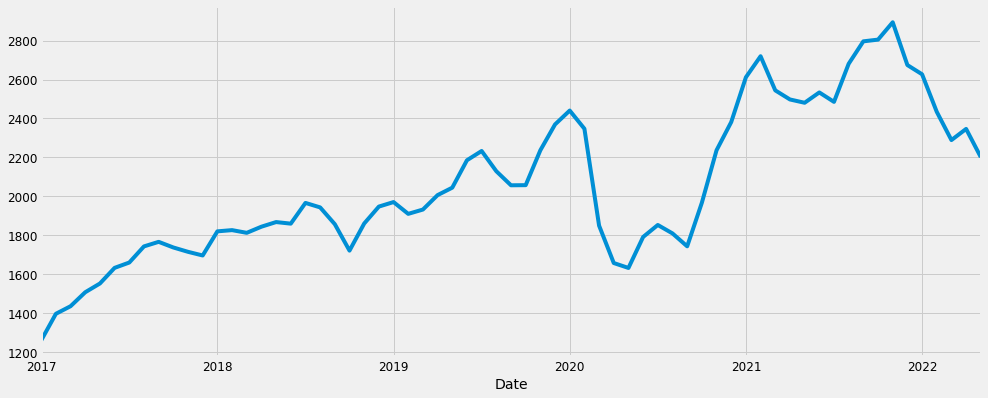

In [39]:
monthly_mean.plot(figsize=(15, 6))
plt.show()

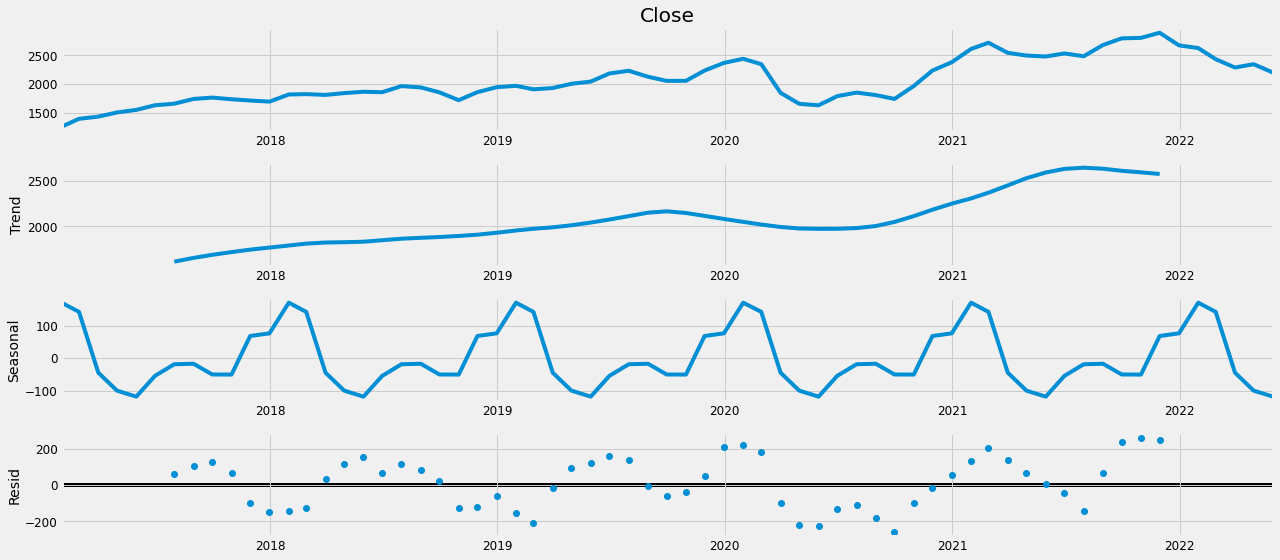

In [40]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(monthly_mean, model='additive')
fig = decomposition.plot()
plt.show()

In [54]:
import numpy as np
monthly_mean = np.log(monthly_mean)

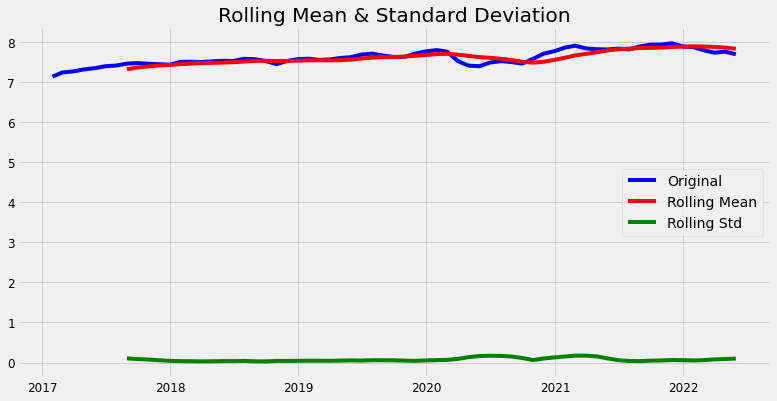


Results of Dickey-Fuller Test: 

Test Statistic                 -2.393039
p-value                         0.143711
#Lags Used                      1.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64


In [56]:
from statsmodels.tsa.stattools import adfuller
def stationarity_check(ts):
            
    # Calculate rolling statistics
    roll_mean = ts.rolling(window=8, center=False).mean()
    roll_std = ts.rolling(window=8, center=False).std()

    # Perform the Dickey Fuller test
    dftest = adfuller(ts) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results

    print('\nResults of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
stationarity_check(monthly_mean)

In [57]:
import pandas as pd
diff = pd.DataFrame({"actual": monthly_mean, "diff1": monthly_mean.diff(3)}).head(10)
diff["diff2"] = diff.diff1.diff(1)
diff

,actual,diff1,diff2
Date,,,
2017-01-31,7.138224,NaN,NaN
2017-02-28,7.241278,NaN,NaN
2017-03-31,7.268838,NaN,NaN
2017-04-30,7.317661,0.179436,NaN
2017-05-31,7.347054,0.105776,-0.073660
2017-06-30,7.397522,0.128684,0.022908
2017-07-31,7.414209,0.096548,-0.032136
2017-08-31,7.462927,0.115874,0.019326
2017-09-30,7.476309,0.078787,-0.037086


In [58]:
result = adfuller(monthly_mean.diff(periods=1).dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.147482
p-value: 0.000011


In [59]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [60]:
l_param = []
l_param_seasonal=[]
l_results_aic=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            l_param.append(param)
            l_param_seasonal.append(param_seasonal)
            l_results_aic.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:443.6012833411064
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:320.8250494603472
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-17.469814172393505
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-9.378942051277217
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-30.06784790143424


c:\Users\neera\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-59.329145317611264
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-11.398082044184084
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-10.866201421616594
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:356.5708800248967


c:\Users\neera\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:293.3885032769234
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-69.351020289572
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-49.1068271855276


c:\Users\neera\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-27.26612004111287
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-102.86648256117478
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-52.149330657442476
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-48.221033151097394
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-175.61972502251973
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-135.2031596204401
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-115.38833411227756
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-92.29575129402166
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-139.33060015113517
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-133.7366529127259
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-89.4498783319789
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:-89.04591594088495
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-181.74140912674804
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:-140.1621477185178
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:-122.73562909098828
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-98.04735433536212
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-147.8783713632804
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:-138

c:\Users\neera\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:-137.33112248327163
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:-130.41051321437072
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:-89.61057758428677
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:-92.6317123040238
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:-183.77359566970765
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:-136.21315087185977
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:-127.77588696378601


c:\Users\neera\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:-103.34140473694497
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:-145.89116634778995


c:\Users\neera\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:-138.98019405097787
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:-98.52712931195734
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:-96.42177417586143
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:-184.52126322905187
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:-143.38476758815483
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-125.46759458217659


c:\Users\neera\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:-102.83595898663637
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-143.2488946760774
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:-141.54981430738806
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-93.64009091260868
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:-94.67096950861236
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-180.06248943067925
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:-138.70750773639332
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:-121.73750496895116
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:-98.47321902812952
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-142.62397064498919
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-137.01362380175948
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-93.57992756295248
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-90.91859287562593


In [61]:
minimum=l_results_aic[0]
for i in l_results_aic[1:]:
    if i < minimum: 
        minimum = i
i=l_results_aic.index(minimum)

In [62]:
mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                order=l_param[i],
                                seasonal_order=l_param_seasonal[i],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3928      0.153      2.571      0.010       0.093       0.692
sigma2         0.0029      0.000      8.987      0.000       0.002       0.004


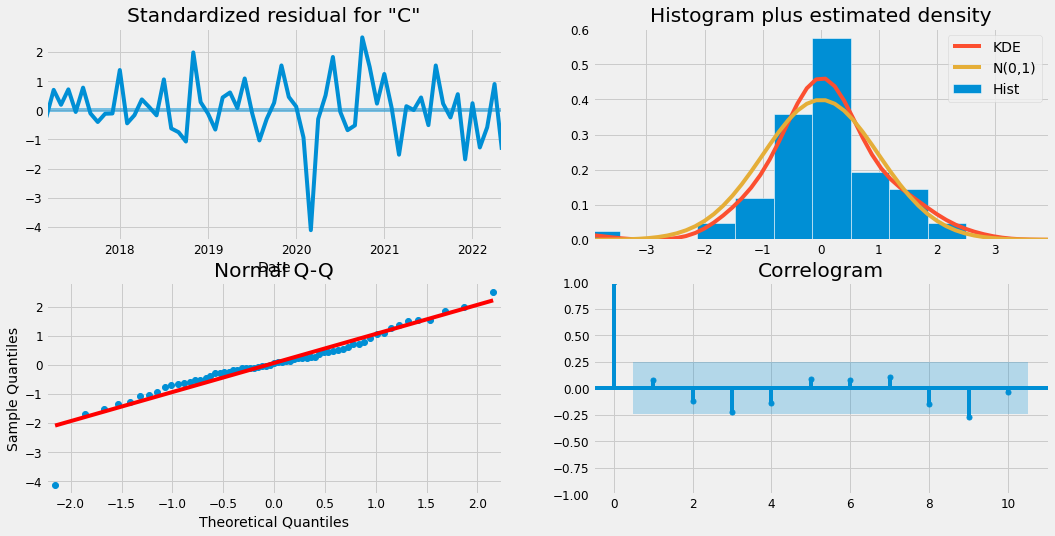

In [63]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

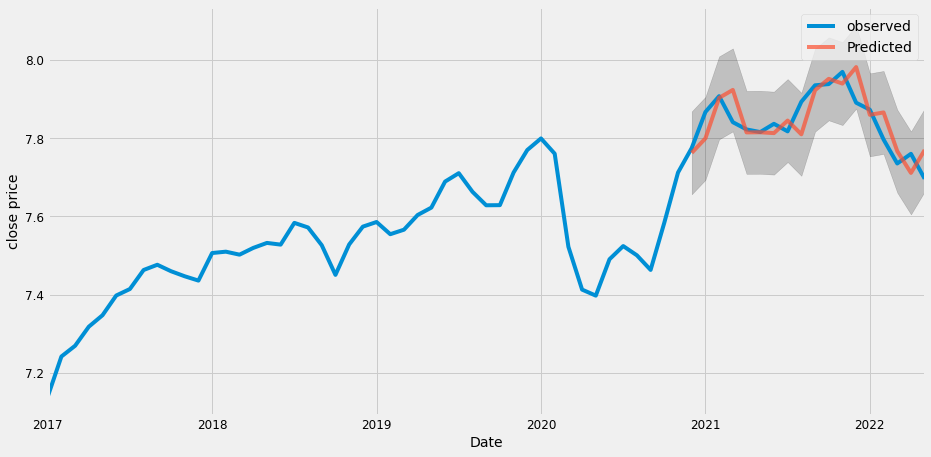

In [64]:
pred = results.get_prediction(start=pd.to_datetime('2020-12-31'), dynamic=False)
pred_ci = pred.conf_int()

ax = monthly_mean['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('close price')
plt.legend()

plt.show()